In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import classification_report


In [5]:
df = pd.read_csv("/kaggle/input/c/spaceship-titanic/train.csv")
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [7]:
df.shape

(8693, 14)

In [8]:
df.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [10]:
df.dropna(inplace=True)

In [38]:
Tf_df["Transported"].value_counts()

Transported
True     3327
False    3279
Name: count, dtype: int64

In [11]:
df.isna().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6606 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   6606 non-null   object 
 1   HomePlanet    6606 non-null   object 
 2   CryoSleep     6606 non-null   object 
 3   Cabin         6606 non-null   object 
 4   Destination   6606 non-null   object 
 5   Age           6606 non-null   float64
 6   VIP           6606 non-null   object 
 7   RoomService   6606 non-null   float64
 8   FoodCourt     6606 non-null   float64
 9   ShoppingMall  6606 non-null   float64
 10  Spa           6606 non-null   float64
 11  VRDeck        6606 non-null   float64
 12  Name          6606 non-null   object 
 13  Transported   6606 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 729.0+ KB


In [15]:
Tf_df = df[["RoomService", "Spa", "FoodCourt", "ShoppingMall", "Age", "VIP", "CryoSleep","Transported"]]
Tf_df.head()

,RoomService,Spa,FoodCourt,ShoppingMall,Age,VIP,CryoSleep,Transported
0,0.0,0.0,0.0,0.0,39.0,False,False,False
1,109.0,549.0,9.0,25.0,24.0,False,False,True
2,43.0,6715.0,3576.0,0.0,58.0,True,False,False
3,0.0,3329.0,1283.0,371.0,33.0,False,False,False
4,303.0,565.0,70.0,151.0,16.0,False,False,True


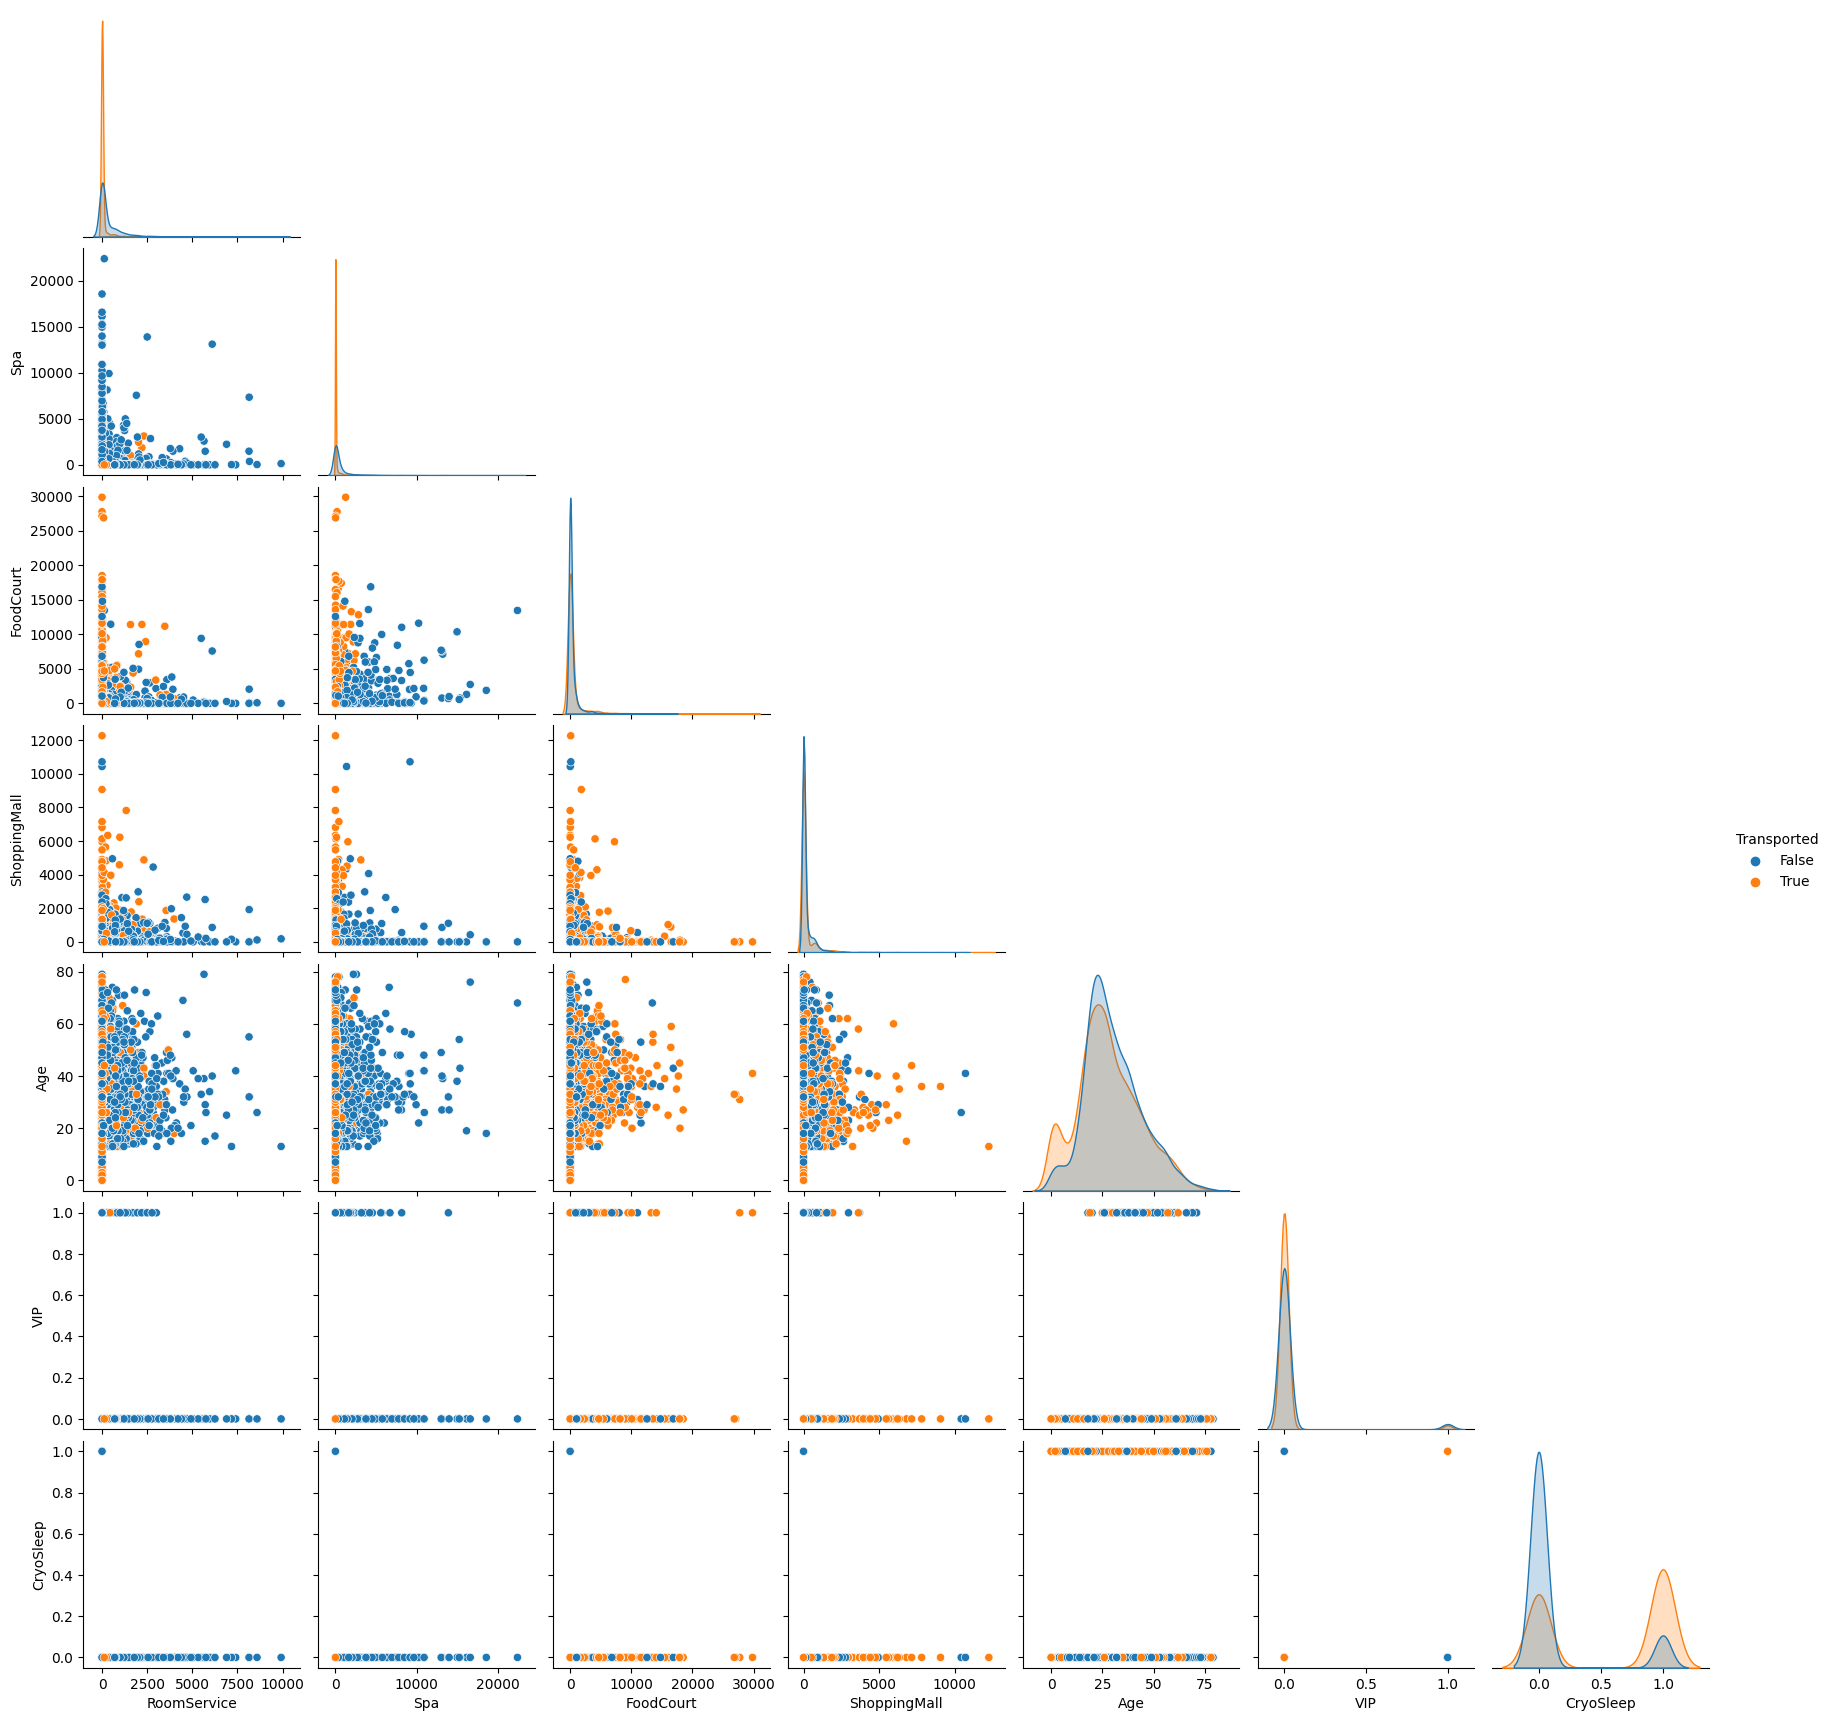

In [19]:
sns.pairplot(Tf_df, corner=True, hue="Transported")

In [21]:
from sklearn.preprocessing import OneHotEncoder

Tf_df = pd.get_dummies(Tf_df, drop_first=True, dtype="int64")
Tf_df.head()

,RoomService,Spa,FoodCourt,ShoppingMall,Age,Transported,VIP_True,CryoSleep_True
0,0.0,0.0,0.0,0.0,39.0,False,0,0
1,109.0,549.0,9.0,25.0,24.0,True,0,0
2,43.0,6715.0,3576.0,0.0,58.0,False,1,0
3,0.0,3329.0,1283.0,371.0,33.0,False,0,0
4,303.0,565.0,70.0,151.0,16.0,True,0,0


In [22]:
y =Tf_df["Transported"]
X = Tf_df.drop('Transported', axis=1)


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
model = LogisticRegression()

In [30]:
model.fit(X_train,  y_train)

LogisticRegression()

In [32]:
y_pred = model.predict(X_test)
y_pred

array([ True,  True,  True, ...,  True,  True,  True])

In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.74      0.82      0.78       653
        True       0.81      0.72      0.76       669

    accuracy                           0.77      1322
   macro avg       0.78      0.77      0.77      1322
weighted avg       0.78      0.77      0.77      1322

